# 1)Importing all the dependencies

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor


## 2)Loading this data set into a pandas data frame (both data and target)



In [23]:
url = 'https://github.com/3Vikram-K/House-Price-Prediction-using-XGBoost-Regression/blob/88b6f547bbb0ebb983a56c067eb34c433ba13cac/HousingData.csv' + '?raw=true'
df = pd.read_csv(url)
df.rename(columns={'MEDV':'PRICE'},inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## 3)Analysing the dimensions of the Dataset of Dataframe

In [24]:
df.shape

(506, 14)

## 4)Checking for any null values in the dataframe

In [25]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
PRICE       0
dtype: int64

## 5) Replacing all the null values with the mean value of the respective column

In [26]:
for i in df.columns:
    mean = df[i].mean()
    df[i] = df[i].fillna(mean)

In [27]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## 6)Some statistical features of the data

In [28]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
correlations = df.corr()

In [30]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

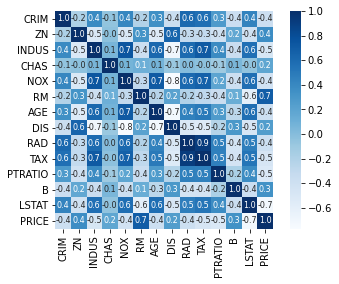

In [31]:
sns.heatmap(correlations,square = True,fmt = '.1f',annot=True,annot_kws={'size': 8},cmap = 'Blues')

## 7)Splitting the data set into features and target and then further splitting them into test and training sets

In [32]:
x = df.drop(['PRICE'],axis =1)
y = df[['PRICE']]
print(type(x),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [33]:
train_x,testx,train_y,testy = train_test_split(x,y,test_size=0.2,random_state=1)

## 8)Calling the XBGRegressor model from the xgboost library and training it with training set

In [34]:
regr = XGBRegressor()

In [35]:
regr.fit(train_x , train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## 9)Predicting the results for both training and test sets and measuring the ML model's accuracy

In [36]:
proto_y = regr.predict(train_x)
predictions = regr.predict(testx)

In [37]:
# R2 scores
r2s1 = metrics.r2_score(train_y,proto_y)
r2s2 = metrics.r2_score(testy,predictions)
print(f'R2 scores for predictions on \ntraining set : {r2s1}\ntest set : {r2s2}')

R2 scores for predictions on 
training set : 0.9999955779335931
test set : 0.9140321202027819


In [38]:
# Mean Absolute Error
m1 = metrics.mean_absolute_error(train_y,proto_y)
m2 = metrics.mean_absolute_error(testy,predictions)
print(f'Mean Absloute Error for predictions on \ntraining set : {m1}\ntest set : {m2}')

Mean Absloute Error for predictions on 
training set : 0.013375042688728618
test set : 2.2973593029321413


## 10)Plotting the actual prices and predicted prices for training and test sets

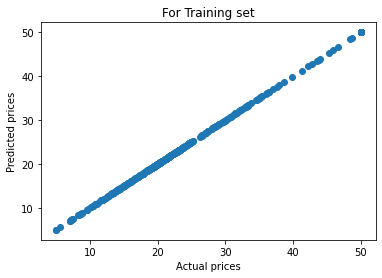

In [ ]:
plt.scatter(train_y,proto_y)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('For Training set')
plt.show()


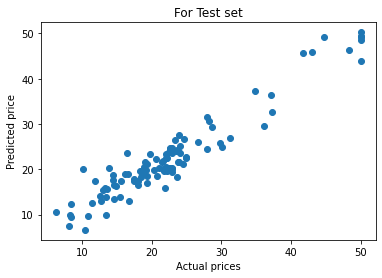

In [ ]:
plt.scatter(testy,predictions)
plt.xlabel('Actual prices')
plt.ylabel('Predicted price')
plt.title('For Test set')
plt.show()


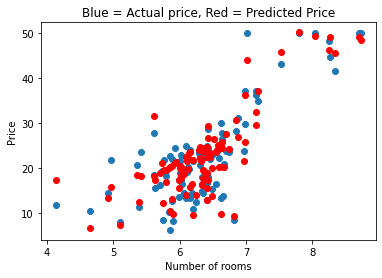

In [49]:
#plotting the actual price and the predicted price against number of rooms which is the feature that makes most difference
plt.scatter(testx['RM'],testy)
plt.scatter(testx['RM'],predictions,color = 'red')
plt.xlabel('Number of rooms')
plt.ylabel('Price')
plt.title('Blue = Actual price, Red = Predicted Price')
plt.show()

# Author - **Kammara Trivikram**